# 图像滤波

滤波实际上是信号处理得一个概念，图像可以看成一个二维信号，其中像素点的灰度值代表信号的强弱；

高低频滤波

- 高频：图像上变化剧烈的部分；
- 低频：图像灰度值变化缓慢，平坦的地方；
- 根据图像高低频，设置高通和低通滤波器。高通滤波器可以检测变化尖锐，明显的地方，低通可以让图像变得平滑，消除噪声；
- 滤波作用：高通滤波器用于<u>**边缘检测**</u>，低通滤波器用于图像<u>**平滑去噪**</u>；

滤波器种类

- 线性滤波：方框滤波/均值滤波/高斯滤波
- 非线性滤波：中值滤波/双边滤波；

领域算子：利用给定像素周围的像素值，决定此像素的最终输出值的一种算子；

线性滤波：一种常用的领域算子，像素输出取决于输入像素的加权和：
$$
g(i,j)=\sum\limits_{k,l}f(i+k,j+l)h(k,l)
$$

$h(k,l)$ 是 kernel，也就是 CNN 里面的卷积算子

---

<img height="500" src="image/convolution.png"/>

# 边界处理 border process

在图像处理过程中，通常需要将图像扩展到原始边界之外。为此，有几种常见的方法用于填充或处理边界区域：

## Padding（填充）
将所有额外的像素设置为一个常量值（通常为零）。

- **特点**: 会产生硬性的过渡边界，容易导致边界伪影（边缘不连续的现象），需要通过窗口函数来减轻这种效应。
- **应用场景**: 通常在需要扩展图像时使用，比如卷积操作的边界填充。

## Clamping（钳制）
重复所有边界像素的值，确保边界区域的像素保持与边缘一致。

- **特点**: 边界行为较好，但缺乏理论基础，因此是一个较为任意的处理方法。
- **应用场景**: 在某些图像处理中，通过钳制的方式，可以避免边界出现过大差异，但不一定适用于所有场景。

## Wrapping（环绕）
将边界像素从图像的另一侧复制过来，即将图像的两边像“环绕”起来。

- **特点**: 环绕操作通常隐含在快速傅里叶变换（FFT）中使用。它适合频域中的某些操作。
- **应用场景**: 在进行频域处理时，经常使用这种方式处理边界问题，例如傅里叶变换。

## Mirroring（镜像）
将图像的边界像素值进行对称反射，使得边界部分看起来像镜像一样。

- **特点**: 这种方式生成的边界光滑、对称、周期性，且没有明显的边界伪影。
- **应用场景**: 镜像操作常用于需要平滑过渡和对称性的图像处理中，如卷积神经网络中的某些边界填充操作。

<img height="600" src="image/border.png"/>

# 线性滤波
## a. 方框滤波

方框滤波（ box Filter）被封装在一个名为 `boxFilter` 的函数中，即 `boxFilter` 函数的作用是使用方框滤波器（ box filter）来模糊一张图片，从 `src` 输入，从 `dst` 输出；

方框滤波核：

$$
\begin{align}
{\rm{K}} &= \alpha \left[ {\begin{array}{*{20}{c}}
1&1& \cdots &1\\
1&1& \cdots &1\\
 \cdots & \cdots & \cdots & \cdots \\
1&1& \cdots &1
\end{array}} \right]\\

\alpha&=
\left\{ {\begin{array}{*{20}{cr}}
{\frac{1}{{{\rm{width}} \times {\rm{height}}}}}&{\quad {\rm{normalize}} = {\rm{true}}}\\
1&{{\rm{normalize}} = {\rm{false}}}
\end{array}} \right.
\end{align}
$$

- `normalize = true` 与均值滤波相同（归一化）
- `normalize = false` 很容易发生溢出（图片像素变白）

函数：`cv2.boxFilter(src, depth, ksize, normalize)`

参数说明

- 参数1：输入图像
- 参数2：目标图像深度
- 参数3：核大小
- 参数4：normalize 属性

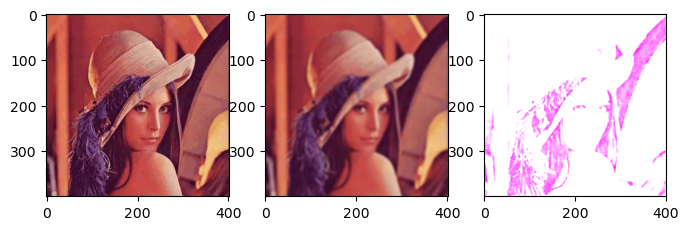

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images2/girl2.png', cv2.IMREAD_UNCHANGED)
r = cv2.boxFilter(img, -1, (7, 7), normalize=1)
d = cv2.boxFilter(img, -1, (3, 3), normalize=0)

plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(r, cv2.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(d, cv2.COLOR_BGR2RGB))
plt.show()

## b. 均值滤波

neighborhood average

均值滤波是一种最简单的滤波处理，它取的是卷积核区域内元素的均值，用 `cv2.blur()` 实现，如 $3\times3$ 的卷积核：
$$
{\rm{kernel}} = \frac{1}{9}\left[ {\begin{array}{*{20}{c}}
1&1&1\\
1&1&1\\
1&1&1
\end{array}} \right]
$$
smoothing in x and y

函数：`cv2.blur(src, ksize)`

参数说明

- 参数1：输入原图
- 参数2： kernel 的大小，一般为奇数

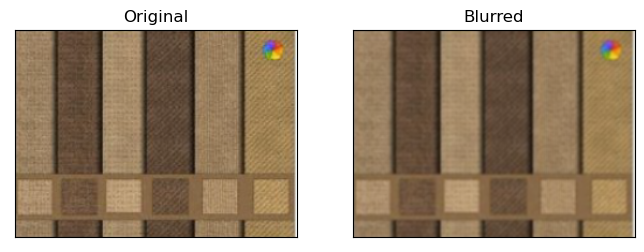

In [5]:
import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
img = cv2.imread('images2/bilateral.png')
blur = cv2.blur(img, ksize=(3, 3))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

图像卷积，图像滤波

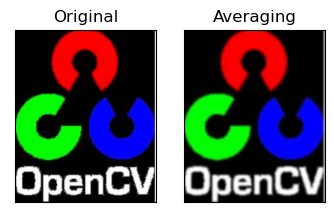

In [4]:
# kernel size = (5,5)
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

plt.figure(figsize=(4, 4))

img = cv.imread('./images2/opencv.png')
kernel = np.ones((5, 5), np.float32) / 25
dst = cv.filter2D(img, -1, kernel)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

均值滤波（Mean Filtering）是一种简单的图像处理技术，它使用一个卷积核（也称为滤波器或窗口）来遍历图像的每一个像素。对于每一个像素，滤波器中的所有值通常都被设置为1，然后与其覆盖的像素值相乘后求和，并除以滤波器中的总数，从而得到一个新的像素值。这个操作的结果是对图像进行平滑处理，以减少噪声。

不同大小的卷积核在均值滤波中会有以下不同效果：

1. **大小**：卷积核的大小通常是奇数，如3x3、5x5、7x7等，这样可以确保卷积核有一个中心像素。

2. **平滑效果**：
   - **较小的卷积核**（例如3x3）：会产生轻微的平滑效果，仅仅能去除小的噪声或轻微的纹理。
   - **较大的卷积核**（例如7x7或更大）：会产生更强烈的平滑效果，可以去除更多的噪声，但可能导致图像失去一些细节信息。

3. **边缘模糊**：均值滤波会使图像的边缘变得模糊。使用较大的卷积核会加强这种模糊效果，因为更多的像素被用来计算每个输出像素的均值。

4. **计算复杂度**：较大的卷积核需要更多的计算。因此，使用大的卷积核会增加滤波操作的计算时间。

5. **局部性**：较小的卷积核更加局部，它仅考虑一个像素周围的小邻域。而较大的卷积核考虑了一个更广泛的区域，这意味着图像中的较大结构可能会被平滑掉。

总的来说，选择哪种大小的卷积核取决于具体的应用需求：如果你想去除细小的噪声并保留图像的大部分细节，可以选择较小的卷积核；如果你想去除更多的噪声并不太关心图像的细节，可以选择较大的卷积核。



## c. 高斯滤波

高斯滤波是一种线性平滑滤波，适用于消除高斯噪声，广泛应用于图像处理的减噪过程。高斯滤波的卷积核权重并不相同，中间像素点权重最高，越远离中心的像素权重越小。其原理是一个 2 维高斯函数）
$$
{\rm{kernel}} = \frac{1}{16}\left[ {\begin{array}{*{20}{c}}
1&2&1\\
2&4&2\\
1&2&1
\end{array}} \right]
$$

<center class="half">
    <img src="./assets/normal_curve.png"/>
    <img src="./assets/normal_curve_3d.png"/>
</center>



高斯滤波相比均值滤波效率要慢，但可以有效消除高斯噪声，能保留更多的图像细节，所以经常被称为最有用的滤波器。

- 它是唯一可分离且圆对称的滤波器
- 在空间和频域具有最佳联合定位
- 高斯的傅里叶变换也是高斯函数
- 任何低通滤波器的 $n$ 倍卷积都收敛到高斯
- 它是无限平滑的，因此可以微分到任何所需的程度
- 它自然缩放（sigma）并允许一致的尺度空间理论
- 如果必须保留小对象，则最好使用高斯滤波


函数：`cv2.Guassianblur(src, ksize, std)`

参数说明

- 参数1：输入原图
- 参数2：高斯核大小
- 参数3：标准差 $\sigma$，平滑时，调整 $\sigma$ 实际是在调整周围像素对当前像素的影响程度，调大 $\sigma$ 即提高了远处像素对中心像素的影响程度，滤波结果也就越平滑。

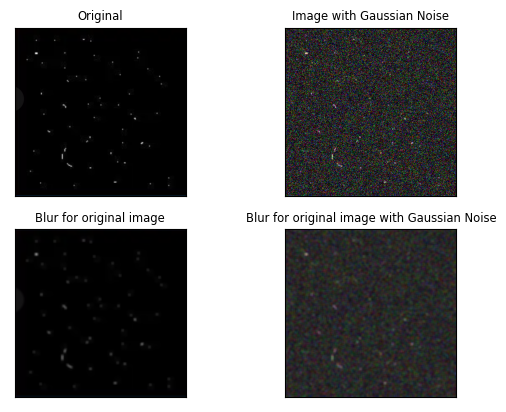

In [21]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images2/median.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(221), plt.imshow(img), plt.title('Original', fontsize='small'), plt.xticks([]), plt.yticks([])

# add noise
mean = 0
sigma = 100
gaussian_noise = np.random.normal(mean, sigma, img.shape)
noisy_image = img + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)  # # 确保像素值在0到255之间
plt.subplot(222), plt.imshow(noisy_image, cmap='gray'), plt.title('Image with Gaussian Noise', fontsize='small'), plt.xticks([]), plt.yticks([])

blur = cv2.GaussianBlur(img, ksize=(7, 7), sigmaX=7)
plt.subplot(223), plt.imshow(blur), plt.title('Blur for original image', fontsize='small'), plt.xticks([]), plt.yticks([])

blur2 = cv2.GaussianBlur(noisy_image, ksize=(7, 7), sigmaX=7)
plt.subplot(224), plt.imshow(blur2), plt.title('Blur for original image with Gaussian Noise', fontsize='small'), plt.xticks([]), plt.yticks([])

plt.show()

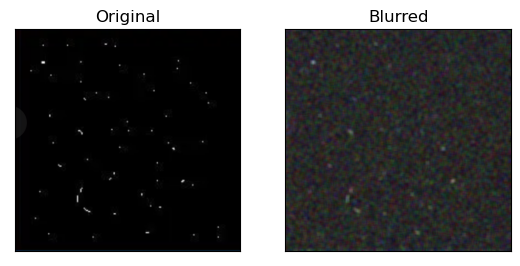

In [13]:
blur2 = cv2.GaussianBlur(noisy_image, (7, 7), 7)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur2), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 非线性滤波

都会改变图像本身的性质，所以在医学图像中要慎用

## a. 中值滤波

中值滤波是一种非线性滤波，是用像素点邻域灰度值的中指代替该点的灰度值，中值滤波可以去除椒盐噪声和斑点噪声。

- 强制具有不同强度的像素更像它们的邻居
- 它消除了孤立的强度尖峰（salt and pepper image noise）
- 邻域的大小通常为 $n\times n$ 像素，$n = 3, 5, 7$
- 这也消除了 pixel clusters（亮或暗）面积 $n^2/2$
- 如果必须删除小对象，中值过滤是最好的

函数：`cv2.medianBlur(img,ksize)`

参数说明:

- 参数1：输入原图
- 参数2：核大小

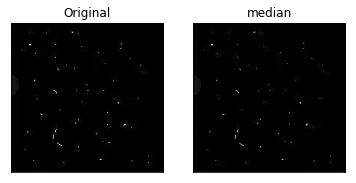

In [5]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('image/median.png')
median = cv.medianBlur(img, 3)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(median), plt.title('median')
plt.xticks([]), plt.yticks([])
plt.show()

## b. 双边滤波

双边滤波是一种非线性的滤波方法，是结合图像的空间邻近度和像素值相似度的一种折中处理，同时考虑空间与信息和灰度相似性，达到**保边去噪**的目的，具有简单、非迭代、局部处理的特点。

函数： `cv2.bilateralFilter(src=image, d,sigmaColor, sigmaSpace)`

参数说明

- 参数1：输入原图
- 参数2：像素的邻域直径
- 参数3：灰度值相似性高斯函数标准差
- 参数4：空间高斯函数标准差



关于2个sigma参数：
- 简单起见，可以令2个sigma的值相等；
- 如果他们很小（小于10），那么滤波器几乎没有什么效果；
- 如果他们很大（大于150），那么滤波器的效果会很强，使图像显得非常卡通化；

关于参数d：
- 过大的滤波器（d>5）执行效率低。
- 对于实时应用，建议取d=5；
- 对于需要过滤严重噪声的离线应用，可取d=9；
- d>0时，由d指定邻域直径；
- d<=0时，d会自动由sigmaSpace的值确定，且d与sigmaSpace成正比；

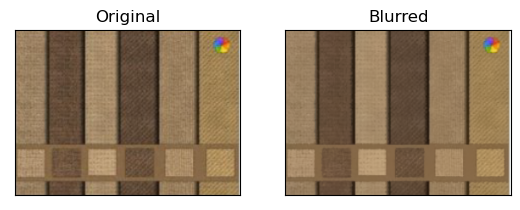

In [10]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images2/bilateral.png')
img = cv2.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv2.bilateralFilter(img, -1, 15, 10)
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 图像增强


图像锐化（增强）是图像处理中的一个常用技术，它旨在增强图像的边缘和细节，使其更加清晰。锐化的原理是加强或增强图像的高频部分。以下是关于图像锐化的主要知识点：

拉普拉斯锐化：
- 拉普拉斯锐化基于二阶导数，其目的是检测图像的快速变化区域，即边缘。
- 一个常见的拉普拉斯滤波器是:
$$
{\rm{kernel}} = \frac{1}{16}\left[ {\begin{array}{*{20}{c}}
0&-1&0\\
-1&5&-1\\
0&-1&0
\end{array}} \right]
$$
将此滤波器应用于图像，并将得到的结果添加到原始图像上，从而实现锐化效果。

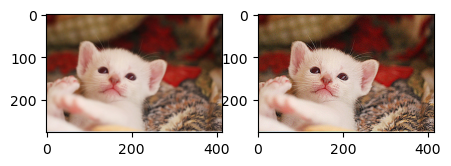

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))


def custom_blur_demo(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32)  #锐化
    dst = cv.filter2D(image, -1, kernel=kernel)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


src = cv.imread("./images2/sharpen.png")
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
custom_blur_demo(src)

高通滤波锐化：
- 高通滤波可以强调图像的高频部分，例如边缘和噪声。
- 常见的方法是先使用低通滤波器（如均值滤波或高斯滤波）对图像进行平滑，然后从原始图像中减去平滑后的图像，得到高频组件。最后，将高频组件加回到原图上以达到锐化效果。

Unsharp Masking：
- 这是一种常用的图像锐化技术。首先，原始图像被模糊（通常使用高斯滤波），然后模糊的图像从原始图像中减去，得到所谓的"mask"。最后，这个mask被加回到原始图像上。
这种方法的名字可能会引起混淆，因为它是通过增强图像的高频部分来“锐化”图像的。

锐化的副作用：
- 过度锐化可能导致图像上出现不自然的边缘和伪轮廓。
- 锐化也可能增强图像中的噪声。

锐化的应用：
- 锐化通常用于摄影后期处理，帮助增强图像细节。
- 扫描和打印过程中也可能使用锐化，以补偿设备固有的模糊。

- 在进行图像锐化时，通常需要小心调整参数以避免过度锐化，并根据特定的应用和图像内容选择合适的方法。